In [1]:
import tensorflow as tf
print(tf.version)
if tf.test.gpu_device_name(): 
    print(f'Default GPU Device:{tf.test.gpu_device_name()}')

E:\Softwares\Anaconda\envs\nlp\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
E:\Softwares\Anaconda\envs\nlp\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
E:\Softwares\Anaconda\envs\nlp\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


<module 'tensorflow._api.v2.version' from 'C:\\Users\\sayan\\AppData\\Roaming\\Python\\Python37\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>
Default GPU Device:/device:GPU:0


# Linear Regression

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

In [9]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [10]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [11]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [24]:
print(dftrain.loc[0], '\n', y_train.loc[0]) # locate row 0

sex                          male
age                            22
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object 
 0


In [25]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [26]:
dftrain.shape

(627, 9)

### Plotting the data

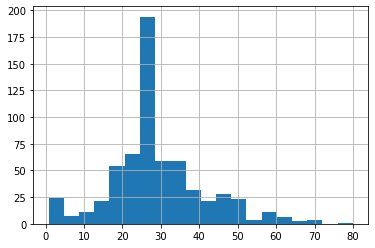

In [27]:
dftrain.age.hist(bins=20)

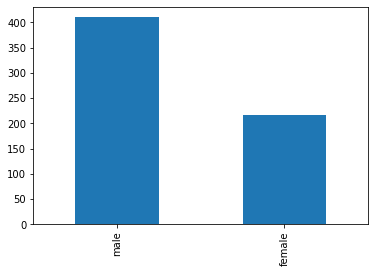

In [33]:
dftrain.sex.value_counts().plot(kind='bar')

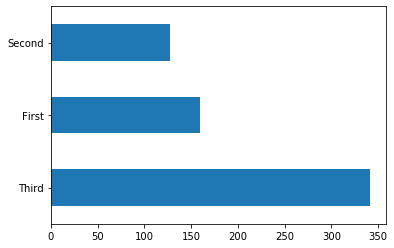

In [34]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% Survived')

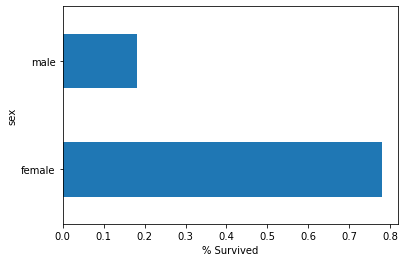

In [49]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').mean()['survived'].plot(kind='barh').set_xlabel('% Survived')

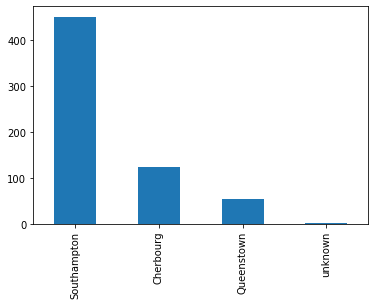

In [50]:
dftrain['embark_town'].value_counts().plot(kind='bar')

## Feature Columns

In [48]:
Categorical_columns = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
Numeric_columns = ['age', 'fare']

feature_columns = []

for feature_name in Categorical_columns:
    vocab = dftrain[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocab))
    
for feature_name in Numeric_columns:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))
    
for col in feature_columns:
    print(col)

VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)
VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0)
VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0)
VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0)
VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0)
VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0)
VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, default_va

In [62]:
def make_input_fn(data_df, label_df, num_epochs=50, shuffle=True, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function

In [63]:
train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

## Making the model

In [64]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\sayan\\AppData\\Local\\Temp\\tmphxy06ipt', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


C:\Users\sayan\AppData\Roaming\Python\Python37\site-packages\tensorflow_estimator\python\estimator\canned\linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\sayan\AppData\Local\Temp\tmphxy06ipt\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 23.0524
INFO:tensorflow:loss = 0.4096706, step = 100 (4.339 sec)
INFO:tensorflow:global_step/sec: 24.5045
INFO:tensorflow:loss = 0.478348, step = 200 (4.080 sec)
INFO:tensorflow:global_step/sec: 24.7605
INFO:tensorflow:loss = 0.4682432, step = 300 (4.040 sec)
INFO:tensorflow:global_step/sec: 25.0809
INFO:tensorflow:loss = 0.3332498, step = 400 (3.986 sec)
INFO:tensorflow:global_step/sec: 24.6575
INFO:tensorflow:loss = 0.47775373, step = 500 (4.057 sec)
INFO:tensor

In [65]:
print(result['accuracy'])

0.77272725


In [72]:
result = list(linear_est.predict(eval_input_fn))
for res in result[:5]:
    print(res)

INFO:tensorflow:Calling model_fn.


C:\Users\sayan\AppData\Roaming\Python\Python37\site-packages\tensorflow_estimator\python\estimator\canned\linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sayan\AppData\Local\Temp\tmphxy06ipt\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'logits': array([-2.5895982], dtype=float32), 'logistic': array([0.06981087], dtype=float32), 'probabilities': array([0.9301891 , 0.06981087], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}
{'logits': array([0.10221542], dtype=float32), 'logistic': array([0.5255316], dtype=float32), 'probabilities': array([0.47446835, 0.5255316 ], dtype=float32), 'class_ids': array([1], dtype=int64), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}
{'logits': array([1.0847427], dtype=float32), 'logistic': array([0.74739045], dtype=float32), 'pro

In [68]:
print(result[0]['probabilities'][0]) # Not survive

0.9301891


In [71]:
print(dfeval.loc[0])
print("Probability of surviving: ", result[0]['probabilities'][1]) # Survive

sex                          male
age                            35
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object
Probability of surviving:  0.06981087


## Using Tensorflow 2 for Linear Regression

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [74]:
np.set_printoptions(precision=3, suppress=True) # Make NumPy printouts easier to read.

In [75]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.0


In [117]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
df = pd.read_csv(url, names=column_names, sep=' ', skipinitialspace=True, na_values='?', comment='\t')
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [118]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [119]:
df = df.dropna()

In [120]:
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
df = pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='')

In [121]:
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [122]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('MPG', axis=1), df['MPG'], test_size=0.2)

In [123]:
x_train.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
1,8,350.0,165.0,3693.0,11.5,70,0,0,1
151,4,79.0,67.0,2000.0,16.0,74,1,0,0
266,4,98.0,68.0,2155.0,16.5,78,0,0,1
285,8,305.0,130.0,3840.0,15.4,79,0,0,1
116,8,400.0,230.0,4278.0,9.5,73,0,0,1


In [124]:
x_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cylinders,313.0,5.460064,1.686818,3.0,4.0,4.0,8.0,8.0
Displacement,313.0,193.257188,103.440983,68.0,105.0,146.0,262.0,455.0
Horsepower,313.0,103.715655,38.306527,46.0,76.0,92.0,122.0,230.0
Weight,313.0,2969.143770,851.914907,1613.0,2220.0,2789.0,3605.0,5140.0
Acceleration,313.0,15.553674,2.681285,8.0,14.0,15.5,17.0,24.8
Model Year,313.0,75.910543,3.755976,70.0,73.0,76.0,79.0,82.0
Europe,313.0,0.175719,0.381190,0.0,0.0,0.0,0.0,1.0
Japan,313.0,0.182109,0.386552,0.0,0.0,0.0,0.0,1.0
USA,313.0,0.642173,0.480129,0.0,0.0,1.0,1.0,1.0


In [125]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(x_train))
print(normalizer.mean.numpy())

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[[   5.46   193.257  103.716 2969.144   15.554   75.911    0.176    0.182
     0.642]]


In [131]:
first = np.array(x_train[:1])

In [134]:
with np.printoptions(precision=2, suppress=True):
    print("Without normalisation: ", first)
    print("With normalisation: ", np.array(normalizer(first)))

Without normalisation:  [[   8.   350.   165.  3693.    11.5   70.     0.     0.     1. ]]
With normalisation:  [[ 1.51  1.52  1.6   0.85 -1.51 -1.58 -0.46 -0.47  0.75]]


### Linear regression with one variable

In [139]:
hp = np.array(x_train['Horsepower'])
hp_normalizer = layers.Normalization(input_shape=[1,], axis=None)
hp_normalizer.adapt(hp)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [153]:
hp_model = tf.keras.Sequential([
    hp_normalizer,
    layers.Dense(units=1)
])

hp_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_7 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [154]:
hp_model.compile(
optimizer=tf.optimizers.Adam(learning_rate=0.1),
loss='mean_absolute_error')

In [155]:
%%time
history = hp_model.fit(
x_train['Horsepower'],
y_train,
epochs=100,
verbose=1,
validation_split=0.2)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/8 [==>...........................] - ETA: 1s - loss: 24.3705WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000024FFCF13DC8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full

In [156]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

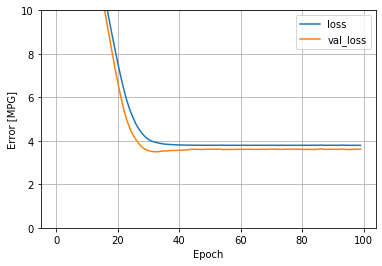

In [157]:
plot_loss(history)

In [160]:
test_results = dict()
test_results['hp_model'] = hp_model.evaluate(
x_test['Horsepower'],
y_test)

3/3 [==============================] - 0s 4ms/step - loss: 4.0407


In [159]:
y_train.head()

1      15.0
151    31.0
266    30.0
285    17.0
116    16.0
Name: MPG, dtype: float64

## Linear Regression with Multiple Variables

In [161]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [162]:
linear_model.compile(
optimizer=tf.optimizers.Adam(learning_rate=0.1),
loss='mean_absolute_error')

In [163]:
%%time
history = linear_model.fit(
x_train,
y_train,
epochs=100,
validation_split=0.2)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/8 [==>...........................] - ETA: 2s - loss: 22.8706WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000025018949C18> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full

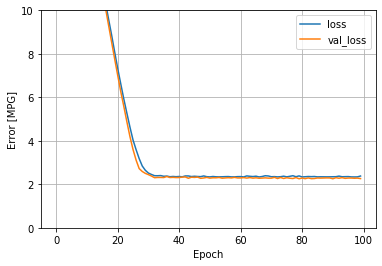

In [164]:
plot_loss(history)

In [165]:
test_results['linear_model'] = linear_model.evaluate(
x_test,
y_test)

3/3 [==============================] - 0s 6ms/step - loss: 2.9317


### Regression with a deep neural network (DNN)

In [166]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(units=64, activation='relu'),
        layers.Dense(units=64, activation='relu'),
        layers.Dense(units=1)
    ])
    
    model.compile(loss='mean_absolute_error',
                 optimizer=tf.keras.optimizers.Adam(0.001))
    
    return model

#### Single Variable

In [167]:
dnn_hp_model = build_and_compile_model(hp_normalizer)

In [168]:
dnn_hp_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_7 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_4 (Dense)             (None, 64)                128       
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [169]:
%%time
history = dnn_hp_model.fit(
x_train['Horsepower'],
y_train,
epochs=100,
validation_split=0.2)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
8/8 [==============================] - ETA: 0s - loss: 23.3349WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000025018A80DC8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full

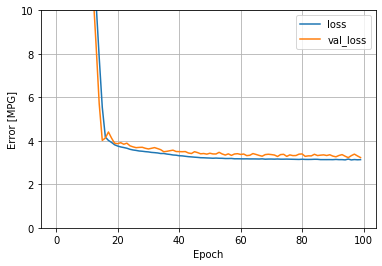

In [170]:
plot_loss(history)

In [172]:
test_results['dnn_hp_model'] = dnn_hp_model.evaluate(
    x_test['Horsepower'], y_test)

3/3 [==============================] - 0s 6ms/step - loss: 3.7768


#### Multi Variable

In [173]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 9)                19        
 ion)                                                            
                                                                 
 dense_7 (Dense)             (None, 64)                640       
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [174]:
%%time
history = dnn_model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
8/8 [==============================] - ETA: 0s - loss: 23.1730WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000025018E0BC18> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full

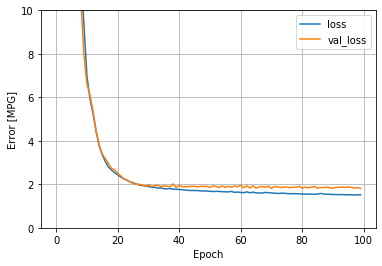

In [175]:
plot_loss(history)

In [178]:
test_results['dnn_model'] = dnn_model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 2.6083
